<a href="https://colab.research.google.com/github/rubenandrebarreiro/fct-nova-introduction-to-operations-research-labs/blob/master/exercises%5Cjupyter-notebooks%5Cchapter-1-linear-programming%5Csub-chapter-2-simplex-algorithm-linear-programming%5Cexercises-chapter-1-sub-chapter-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Scipy Python's Library and,
# its Optimisation Module and Linear Programming Sub-Module
from scipy.optimize import linprog

In [2]:
# Import the NumPy Python's Library, with the alias 'np'
import numpy as np

In [3]:
# Import the matplotlib Python's Library, with the alias 'plt'
import matplotlib.pyplot as plt
%matplotlib inline

## ***Exercise 1***

1. Consider the following problem of ***Linear Programming***:
  
  * $ min \ f(x,y) = -x + 2y $
  <br>
  <br>
  * $ subject \ to: $
    * $ x + y \leq 3 $
    * $ x + 4y \geq 4 $
    * $ -x + y \leq 0 $
    <br>
    <br>
    * $ x, \ y \geq 0 $

  <br>

  * a) Solve it, ***Graphically***.
  * b) Solve it, using the ***Revised Simplex Method***.
  * c) Solve it, using the ***Simplex Method***.


#### ***Exercise 1 - Solutions***

##### a) Solve it, **Graphically**:

<Figure size 5760x5760 with 0 Axes>

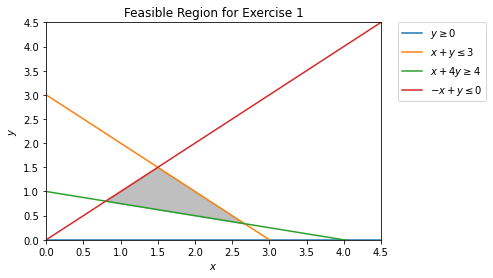

<Figure size 5760x5760 with 0 Axes>

In [4]:
# Construct Graphic Lines

# Steps for Implementation in Python:
# - 1) Set the Lines for the Bounds, as equalities:
#   - The variable x is set indenpendindependently;
#   - The variable y is set as one of yi's, in this case the y0;
# - 2) Set the Lines for the Constraints, as equalities:
#   - All the equations always are solvable, in order to yi;
# - 3) Build the Graphic and Plot the Lines;
# - 4) Fill the Feasible Region:
#   - Set the Maximum and Minimum of the Feasible Region,
#     where, usually the inequations with '>=' are the maximums
#     and the inequations with '<=' are the minimums;
#   - Then, fill the Feasible Region;

# 1) Set the Lines for the Bounds, as equalities:
#   a) x >= 0
x = np.linspace(0, 20, 2000)

#   b) y >= 0
y0 = (x*0)


# 2) Set the Lines for the Constraints, as equalities:
#   a) x + y <= 3 (=) y <= 3 - x
y1 = ( 3 - x )

#   b) x + 4y >= 4 (=) 4y >= 4 - x (=) y >= (4 - x) / 4
y2 = ( 4 - x ) / 4

#   c) -x + y <= 0 (=) y <= x 
y3 = x


# 3) Build the Graphic and Plot the Lines:
plt.plot(x, y0, label=r'$ y \geq 0 $')
plt.plot(x, y1, label=r'$ x + y \leq 3 $')
plt.plot(x, y2, label=r'$ x + 4y \geq 4 $')
plt.plot(x, y3, label=r'$ -x + y \leq 0 $')
plt.xlim((0, 4.5))
plt.ylim((0, 4.5))
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')


# 4) Fill the Feasible Region:
y4 = np.minimum(y1, y3)
y5 = np.maximum(y0, y2)
plt.fill_between(x, y4, y5, where=y4>y5, color='grey', alpha=0.5)


# Extras:

# - Add a Title to the Graphic Plot:
plt.title('Feasible Region for Exercise 1')

# - Add a Legend to the Graphic Plot:
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

# - Adjust the size of the Graphic Plot:
plt.figure(figsize=(80,80))

# - Save the Graphic Plot, in PNG format:
#plt.savefig('exercise-1.png')

##### ***Extra***: **Building the Linear Programming Model**

In [18]:
##### Extra: Building the Linear Programming Model

In [12]:
objective_function = [-1, -2]
#                     ─┬  ─┬
#                      │   └┤ Coefficient for y
#                      └────┤ Coefficient for x

In [13]:
constraints_inequalities = [ [  1 ,  1 ],   # Constraint #1
                             [  1 ,  4 ],   # Constraint #2
                             [ -1 ,  1 ] ]  # Constraint #3

constraints_function_values = [ 3,   # Function Value for Constraint #1
                    4,   # Function Value for Constraint #2
                    0 ]  # Function Value for Constraint #3

In [14]:
variable_bounds = [ (0, float("inf")),   # Bounds of x
                    (0, float("inf")) ]  # Bounds of y

##### b) Solve it, using the ***Revised Simplex Method***

In [15]:
optimization_problem = linprog(c=objective_function,
                               A_ub=constraints_inequalities,
                               b_ub = constraints_function_values,
                               bounds=variable_bounds,
                               method="revised simplex")

In [16]:
optimization_problem

     con: array([], dtype=float64)
     fun: -3.3333333333333335
 message: 'Optimization terminated successfully.'
     nit: 3
   slack: array([0.        , 0.        , 2.33333333])
  status: 0
 success: True
       x: array([2.66666667, 0.33333333])

In [19]:
optimization_problem.fun

-3.3333333333333335

In [20]:
optimization_problem.success

True

In [21]:
optimization_problem.x

array([2.66666667, 0.33333333])